## What is Kaggle ?

<img src="img\Kaggle_logo.png" width='200px'>

- Founded in 2010 by Anthony Goldbloom
- Originally created to solve problems for NASA, Wikipedia, Ford and Deloitte
- Internet platform for Data Science (prediction and analytics)
- 249 competitions (as of 20th June 2017)
- Acquired by Google in 2017
- Defined itself as the "largest community of data scientists"

## The competition we are working on

<img src="img\Kaggle_Planet.png">

#### Multilabel classification problem

- Multiple labels are to be predicted for each instance
- Don't confond with multiclass classification : classify each instance into one of the more than two classes

### Data overview

3 major datasets
- train set (to fit the model) : 40,479 jpeg images ~32go as numpy array
- mapping train set (to get the labels of each image)
- test set (to predict) : 61,191 jpeg images ~48go as numpy array

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

TRAIN_PATH = './data/train-jpg/'

import os
from PIL import Image
import random
import matplotlib.pyplot as plt

In [2]:
df_labels = pd.read_csv('./data/train_v2.csv')
df_labels.head(10)

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road
5,train_5,haze primary water
6,train_6,agriculture clear cultivation primary water
7,train_7,haze primary
8,train_8,agriculture clear cultivation primary
9,train_9,agriculture clear cultivation primary road


In [3]:
labels = df_labels.tags.values

In [4]:
labels_list = []
for lbl in labels:
    labels_list.extend(lbl.split(' '))
labels_set = set(labels_list)
print labels_set

set(['slash_burn', 'clear', 'blooming', 'primary', 'cloudy', 'conventional_mine', 'water', 'haze', 'cultivation', 'partly_cloudy', 'artisinal_mine', 'habitation', 'bare_ground', 'blow_down', 'agriculture', 'road', 'selective_logging'])


In [5]:
df_train = df_labels.tags.str.get_dummies(' ')
df_train.insert(0, 'image_name', df_labels.image_name)
df_train.head(10)

,image_name,agriculture,artisinal_mine,bare_ground,blooming,blow_down,clear,cloudy,conventional_mine,cultivation,habitation,haze,partly_cloudy,primary,road,selective_logging,slash_burn,water
0,train_0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,train_1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,train_2,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,train_3,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,train_4,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0
5,train_5,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
6,train_6,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
7,train_7,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
8,train_8,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
9,train_9,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0


In [6]:
df_train[list(labels_set)].sum().sort_values()

blow_down               98
conventional_mine      100
slash_burn             209
blooming               332
artisinal_mine         339
selective_logging      340
bare_ground            862
cloudy                2089
haze                  2697
habitation            3660
cultivation           4477
partly_cloudy         7261
water                 7411
road                  8071
agriculture          12315
clear                28431
primary              37513
dtype: int64

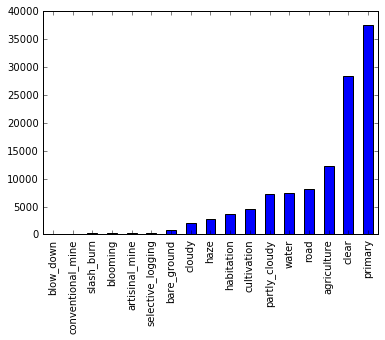

In [7]:
df_train[list(labels_set)].sum().sort_values().plot(kind='bar')

In [8]:
ordered_labels = df_train[list(labels_set)].sum().sort_values(ascending=False).index
type(ordered_labels)

pandas.indexes.base.Index

In [9]:
df_train[ordered_labels].corr()

,primary,clear,agriculture,road,water,partly_cloudy,cultivation,habitation,haze,cloudy,bare_ground,selective_logging,artisinal_mine,blooming,slash_burn,conventional_mine,blow_down
primary,1.000000,0.273743,0.115259,0.058937,0.032609,0.110213,0.092507,0.025513,0.064862,-0.829594,-0.076070,0.025879,0.010236,0.025570,0.020257,0.002535,0.013852
clear,0.273743,1.000000,0.058765,0.084686,0.041464,-0.718208,0.065897,0.097849,-0.410428,-0.358343,0.052982,0.040967,0.040851,0.046617,0.019757,-0.000257,0.017776
agriculture,0.115259,0.058765,1.000000,0.480930,0.063498,0.039743,0.344964,0.303979,-0.031978,-0.154252,-0.013854,-0.022616,-0.038379,-0.041082,0.041518,-0.006948,-0.008538
road,0.058937,0.084686,0.480930,1.000000,0.103498,-0.010596,0.079122,0.443341,-0.035642,-0.116412,0.064728,0.056375,0.028774,-0.038526,-0.004893,0.048653,-0.022068
water,0.032609,0.041464,0.063498,0.103498,1.000000,-0.005721,0.009845,0.054555,0.030541,-0.110432,0.021320,-0.009273,0.166084,-0.031718,-0.012714,0.009898,-0.019422
partly_cloudy,0.110213,-0.718208,0.039743,-0.010596,-0.005721,1.000000,-0.011306,-0.048390,-0.124914,-0.109062,-0.035959,-0.023980,-0.023888,-0.030380,-0.004034,0.013052,-0.005999
cultivation,0.092507,0.065897,0.344964,0.079122,0.009845,-0.011306,1.000000,0.134639,-0.030414,-0.082260,-0.003458,0.017603,-0.016849,-0.001502,0.113073,-0.011202,-0.004550
habitation,0.025513,0.097849,0.303979,0.443341,0.054555,-0.048390,0.134639,1.000000,-0.039675,-0.073547,0.050756,-0.016747,-0.001561,-0.024851,0.026567,0.046781,-0.010273
haze,0.064862,-0.410428,-0.031978,-0.035642,0.030541,-0.124914,-0.030414,-0.039675,1.000000,-0.062324,-0.011276,-0.019162,-0.019118,-0.019903,-0.015101,-0.009305,-0.013162
cloudy,-0.829594,-0.358343,-0.154252,-0.116412,-0.110432,-0.109062,-0.082260,-0.073547,-0.062324,1.000000,-0.034409,-0.021469,-0.021437,-0.021213,-0.016805,-0.011609,-0.011492


In [10]:
import seaborn as sns

In [11]:
df_occurence = df_train[ordered_labels].T.dot(df_train[ordered_labels])
df_occurence

,primary,clear,agriculture,road,water,partly_cloudy,cultivation,habitation,haze,cloudy,bare_ground,selective_logging,artisinal_mine,blooming,slash_burn,conventional_mine,blow_down
primary,37513,27668,11972,7728,7001,7175,4455,3469,2670,0,683,340,324,332,209,94,98
clear,27668,28431,9150,6295,5502,0,3527,3090,0,0,747,308,307,311,173,70,85
agriculture,11972,9150,12315,6034,2712,2493,3377,2737,672,0,225,65,38,32,119,24,22
road,7728,6295,6034,8071,2125,1382,1294,2786,394,0,323,151,110,10,36,59,2
water,7001,5502,2712,2125,7411,1295,868,915,613,0,206,49,299,16,24,26,3
partly_cloudy,7175,0,2493,1382,1295,7261,748,441,0,0,74,27,27,17,33,28,13
cultivation,4455,3527,3377,1294,868,748,4477,895,202,0,89,58,18,35,126,4,8
habitation,3469,3090,2737,2786,915,441,895,3660,129,0,163,13,29,4,41,36,3
haze,2670,0,672,394,613,0,202,129,2697,0,41,5,5,4,3,2,0
cloudy,0,0,0,0,0,0,0,0,0,2089,0,0,0,0,0,0,0


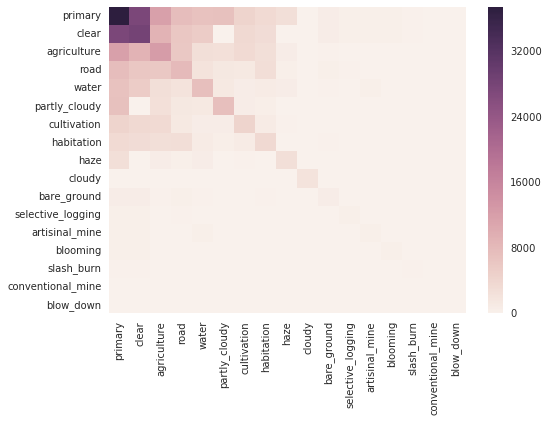

In [12]:
sns.heatmap(df_occurence)

In [13]:
df_percentage = df_train[ordered_labels].sum() / df_train[ordered_labels].count() * 100.0

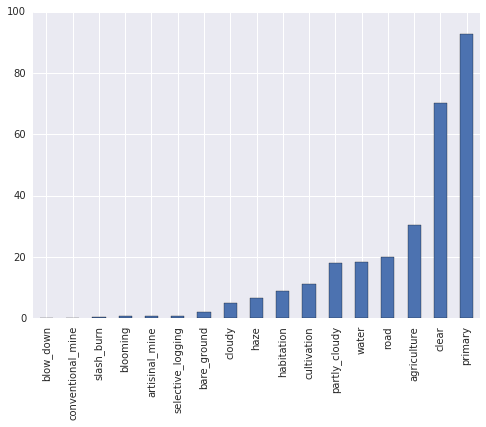

In [14]:
df_percentage.sort_values().plot(kind='bar')

In [15]:
def plot_pictures(label):

    images = df_train[df_train[label] == 1].image_name.values

    fig , ax = plt.subplots(nrows=3, ncols=3, figsize=(8,8))
    ax = ax.flatten()

    for i in range(0,9):
        f = random.choice(images)
        img = Image.open(os.path.join(TRAIN_PATH, f + '.jpg'))
        ax[i].imshow(img)
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        ax[i].set_title("%s h:%s w:%s" % (f, img.height,img.width))
    plt.tight_layout()

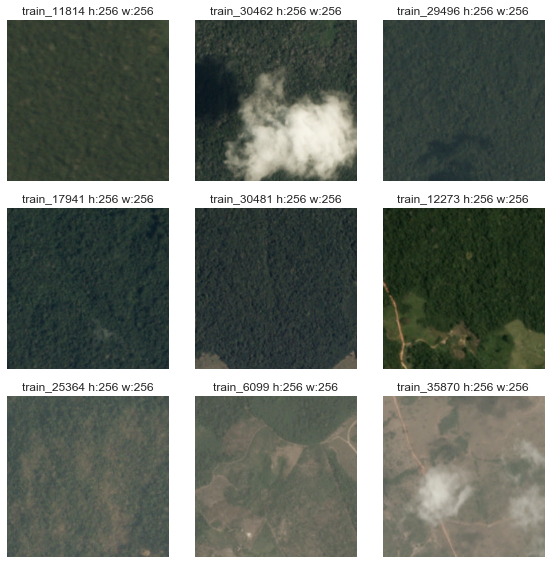

In [16]:
plot_pictures('primary')

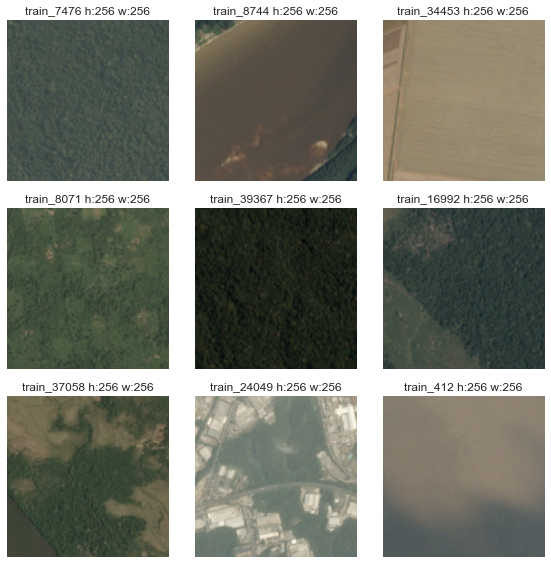

In [17]:
plot_pictures('clear')

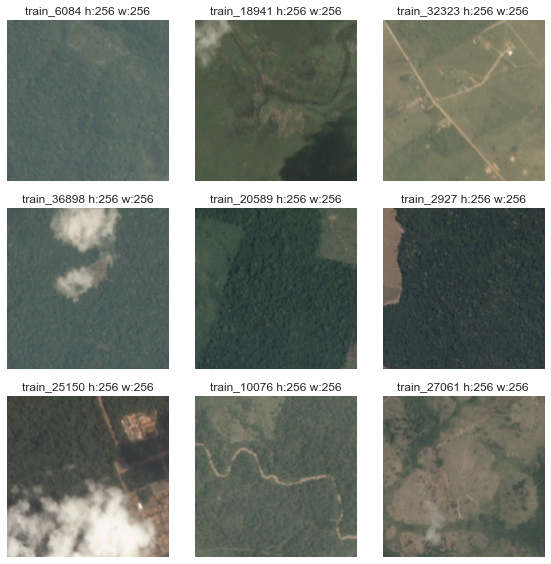

In [18]:
plot_pictures('agriculture')

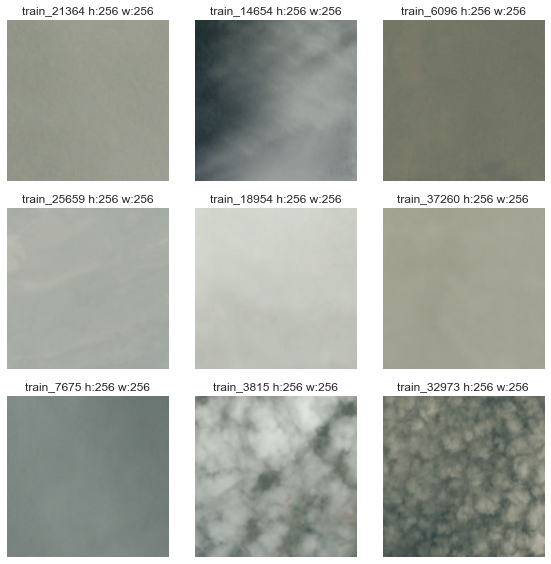

In [19]:
plot_pictures('cloudy')

### Evaluation score

<img src="img\Precisionrecall.svg.png">

<img src="img\f2score.png">

The f2 score weights recall higher than precision

In [1]:
from sklearn.metrics import fbeta_score, precision_score, recall_score

ImportError: No module named 'sklearn'

In [2]:
def fscore(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2)

In [3]:
labels = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
predictions = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [23]:
print 'Precision: %.2f%%' % (precision_score(labels, predictions) * 100.0)
print 'Recall: %.2f%%' % (recall_score(labels, predictions) * 100.0)
print 'F2 score: %.2f%%' % (fscore(labels, predictions) * 100.0)

Precision: 100.00%
Recall: 20.00%
F2 score: 23.81%


In [24]:
labels = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
predictions = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [25]:
print 'Precision: %.2f%%' % (precision_score(labels, predictions) * 100.0)
print 'Recall: %.2f%%' % (recall_score(labels, predictions) * 100.0)
print 'F2 score: %.2f%%' % (fscore(labels, predictions) * 100.0)

Precision: 50.00%
Recall: 100.00%
F2 score: 83.33%


In [26]:
labels = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
predictions = [1, 1, 1, 0, 0, 0, 0, 0, 0, 0]

In [27]:
print 'Precision: %.2f%%' % (precision_score(labels, predictions) * 100.0)
print 'Recall: %.2f%%' % (recall_score(labels, predictions) * 100.0)
print 'F2 score: %.2f%%' % (fscore(labels, predictions) * 100.0)

Precision: 100.00%
Recall: 60.00%
F2 score: 65.22%


### Submission file

<img src="img\submissionfile.png">